<a href="https://colab.research.google.com/github/shipra-bhadauria/Deep-Learning_practice/blob/main/StackedRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

from sklearn.metrics import accuracy_score
from keras.datasets import reuters
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Activation,Dropout,Embedding
from keras import optimizers
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
# parameters for data load
num_words = 30000
maxlen = 50
test_split = 0.3

In [ ]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words = num_words, maxlen = maxlen, test_split = test_split)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [ ]:
y_train.shape

(1395,)

In [ ]:
y_train[0]

3

In [ ]:
# pad the sequences with zeros 
# padding parameter is set to 'post' => 0's are appended to end of sequences
X_train = pad_sequences(X_train, padding = 'post')
X_test = pad_sequences(X_test, padding = 'post')


In [ ]:
X_train[1]

array([  1, 486, 341, 785,  26,  14, 482,  26, 255, 606, 252,  83, 146,
        91, 102,  17,  12,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

In [ ]:
X_train = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1], 1))

In [ ]:
print(X_train.shape)
print(X_test.shape)

(1395, 49, 1)
(599, 49, 1)


In [ ]:
y_data = np.concatenate((y_train, y_test))
y_data = to_categorical(y_data)
y_train = y_data[:1395]
y_test = y_data[1395:]

In [ ]:
print(y_train.shape)
print(y_test.shape)

(1395, 46)
(599, 46)


In [ ]:
def stacked_vanilla_rnn():
    model = Sequential()
    model.add(Embedding(input_dim=num_words, output_dim=8))
    model.add(SimpleRNN(50,return_sequences = True))   # return_sequences parameter has to be set True to stack
    model.add(Dropout(0.3))
    model.add(SimpleRNN(25, return_sequences = False))
    model.add(Dense(46))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001) ## lr= learinng rate
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model

In [ ]:
model = KerasClassifier(build_fn = stacked_vanilla_rnn, epochs = 50, batch_size = 50, verbose = 1,validation_data=(X_test,y_test))


In [ ]:
model=stacked_vanilla_rnn()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 8)           240000    
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, None, 50)          2950      
_________________________________________________________________
dropout_3 (Dropout)          (None, None, 50)          0         
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 46)                2346      
_________________________________________________________________
activation_3 (Activation)    (None, 46)                0         
Total params: 250,346
Trainable params: 250,346
Non-trainable params: 0
________________________________________________

In [ ]:
history=model.fit(X_train, y_train)

Epoch 1/50
28/28 [==============================] - 3s 46ms/step - loss: 2.7330 - accuracy: 0.4834 - val_loss: 1.1092 - val_accuracy: 0.7513
Epoch 2/50
28/28 [==============================] - 1s 33ms/step - loss: 1.0352 - accuracy: 0.7716 - val_loss: 0.9040 - val_accuracy: 0.8013
Epoch 3/50
28/28 [==============================] - 1s 34ms/step - loss: 0.7236 - accuracy: 0.8434 - val_loss: 0.8557 - val_accuracy: 0.8164
Epoch 4/50
28/28 [==============================] - 1s 34ms/step - loss: 0.6910 - accuracy: 0.8491 - val_loss: 0.8556 - val_accuracy: 0.8164
Epoch 5/50
28/28 [==============================] - 1s 34ms/step - loss: 0.5483 - accuracy: 0.8920 - val_loss: 0.8930 - val_accuracy: 0.8063
Epoch 6/50
28/28 [==============================] - 1s 34ms/step - loss: 0.5354 - accuracy: 0.8792 - val_loss: 0.9122 - val_accuracy: 0.8013
Epoch 7/50
28/28 [==============================] - 1s 34ms/step - loss: 0.5017 - accuracy: 0.8865 - val_loss: 0.9001 - val_accuracy: 0.8063
Epoch 8/50
28

In [ ]:
y_pred = model.predict(X_test)
y_test_ = np.argmax(y_test, axis = 1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


12/12 [==============================] - 0s 7ms/step


In [ ]:
print(accuracy_score(y_pred, y_test_))

0.7529215358931552


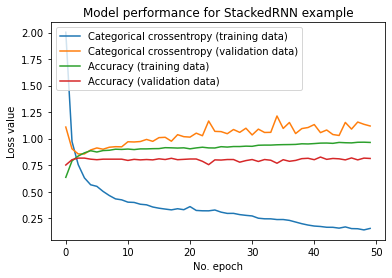

In [ ]:
# Plot history: Categorical crossentropy & Accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Categorical crossentropy (training data)')
plt.plot(history.history['val_loss'], label='Categorical crossentropy (validation data)')
plt.plot(history.history['accuracy'], label='Accuracy (training data)')
plt.plot(history.history['val_accuracy'], label='Accuracy (validation data)')
plt.title('Model performance for StackedRNN example')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()